# Abalone Case Study

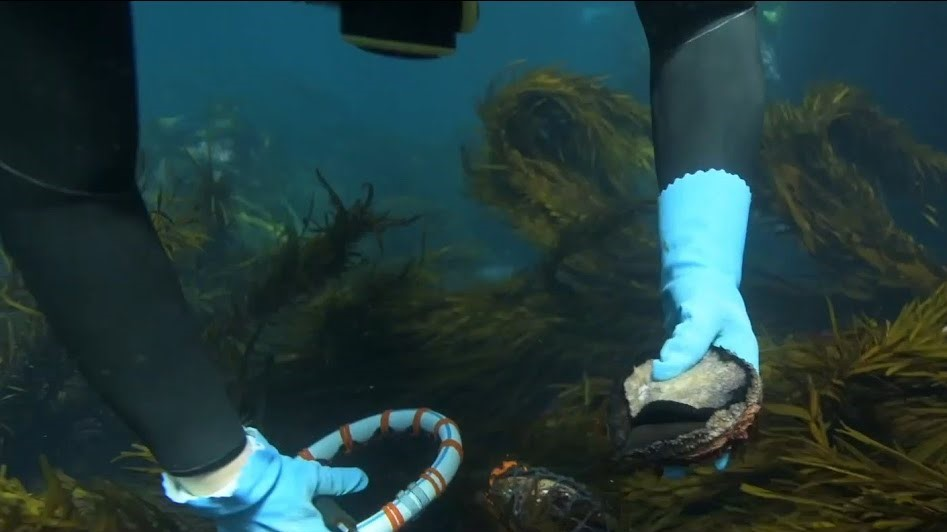

### Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

### Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset

df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# Now lets assign a labels to our quality variable

from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [8]:
# Bad becomes 0 and good becomes 1 

df['Sex'] = label_quality.fit_transform(df['Sex'])

In [9]:
# checking that data is balanced or not

df.value_counts('Sex')

Sex
2    1528
1    1342
0    1307
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

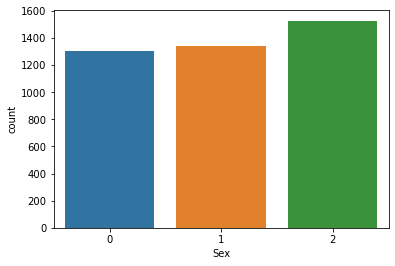

In [10]:
# countplot

sns.countplot(df.Sex)

In [11]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### sumary statistics


In [12]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### checking the skewness ratio

In [13]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='Density'>

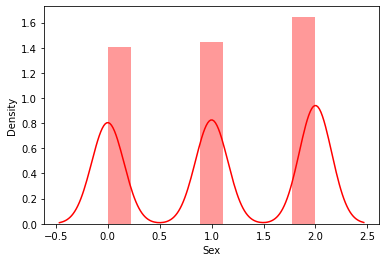

In [14]:
sns.distplot(df['Sex'],color='r')

<AxesSubplot:xlabel='Length', ylabel='Density'>

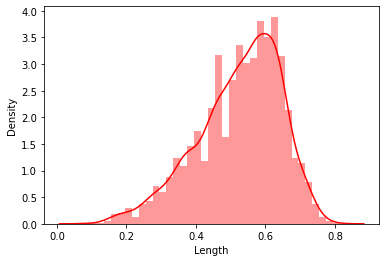

In [15]:
sns.distplot(df['Length'],color='r')

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

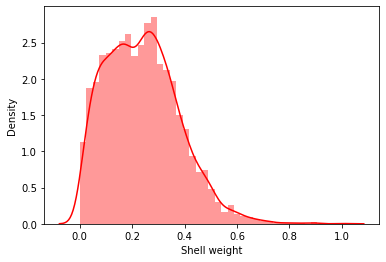

In [16]:
sns.distplot(df['Shell weight'],color='r')

<AxesSubplot:xlabel='Height', ylabel='Density'>

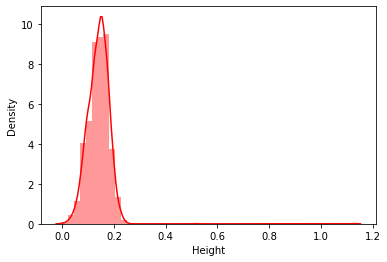

In [17]:
sns.distplot(df['Height'],color='r')


<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

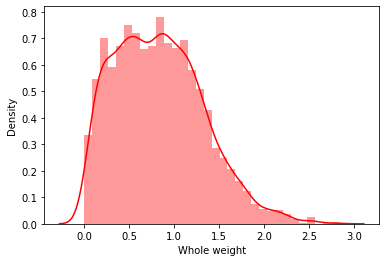

In [18]:
sns.distplot(df['Whole weight'],color='r')


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

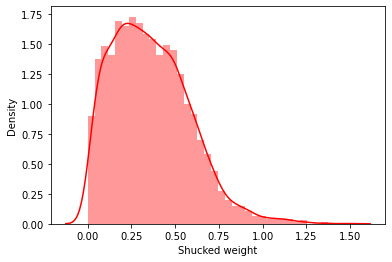

In [19]:
sns.distplot(df['Shucked weight'],color='r')

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

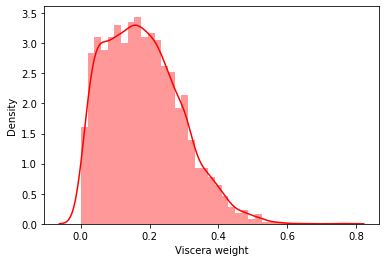

In [20]:
sns.distplot(df['Viscera weight'],color='r')


<AxesSubplot:xlabel='Rings', ylabel='Density'>

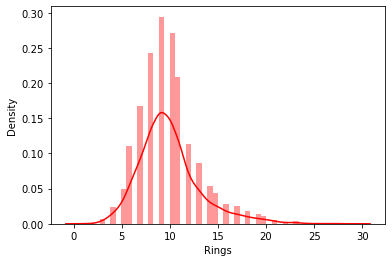

In [21]:
sns.distplot(df['Rings'],color='r')

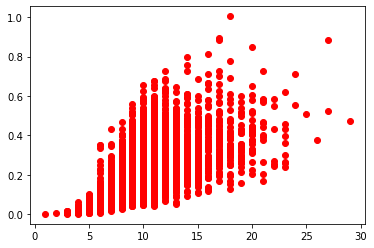

In [22]:
plt.scatter(df['Rings'],df['Shell weight'],color='r')
plt.show()

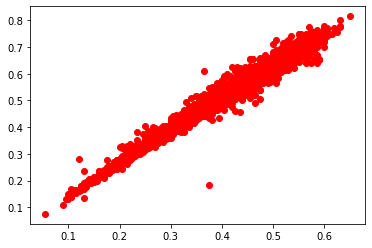

In [23]:
plt.scatter(df['Diameter'],df['Length'],color='r')
plt.show()

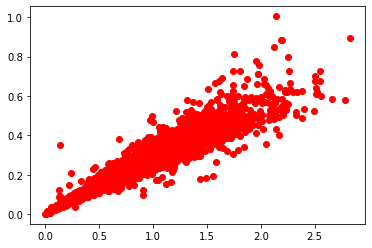

In [24]:
plt.scatter(df['Whole weight'],df['Shell weight'],color='r')
plt.show()

### Correlation

In [25]:
# checking the correlation

df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### Correlation using heatmap

<AxesSubplot:>

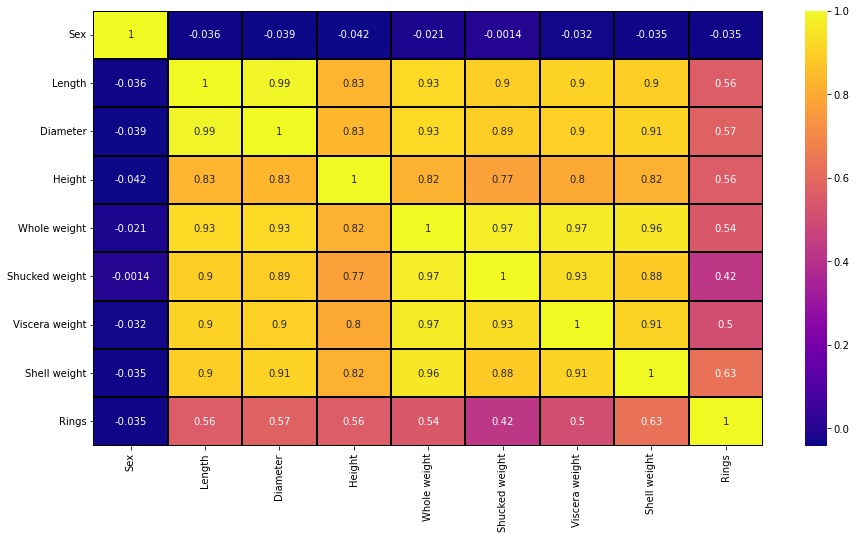

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',fmt='.2g',linewidths=2,linecolor='black')

### Dropping column Sex as it is least affecting the data

In [27]:
df.drop('Sex',inplace=True,axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Checking Outliers

z-score

{'whiskers': [<matplotlib.lines.Line2D at 0x226ad6cfd30>,
 'caps': [<matplotlib.lines.Line2D at 0x226ad370310>,
 'boxes': [<matplotlib.lines.Line2D at 0x226ad6cfa60>],
 'medians': [<matplotlib.lines.Line2D at 0x226ad3708b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x226ad370bb0>],
 'means': []}

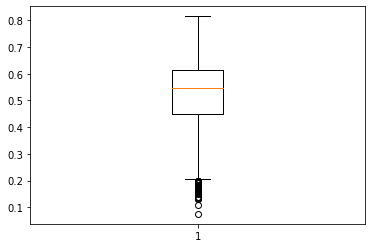

In [28]:
plt.boxplot(df['Length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226ad3c9bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x226ad3da190>,
 'boxes': [<matplotlib.lines.Line2D at 0x226ad3c98e0>],
 'medians': [<matplotlib.lines.Line2D at 0x226ad3da730>],
 'fliers': [<matplotlib.lines.Line2D at 0x226ad3daa00>],
 'means': []}

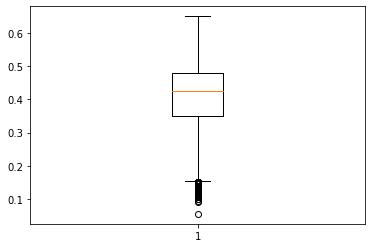

In [29]:
plt.boxplot(df['Diameter'])

{'whiskers': [<matplotlib.lines.Line2D at 0x226ad428eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x226ad439490>,
 'boxes': [<matplotlib.lines.Line2D at 0x226ad428be0>],
 'medians': [<matplotlib.lines.Line2D at 0x226ad439a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x226ad439d00>],
 'means': []}

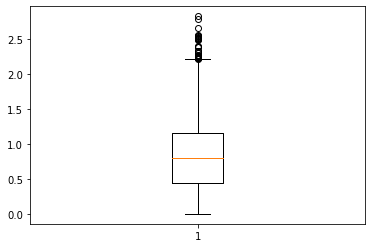

In [30]:
plt.boxplot(df['Whole weight'])

Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

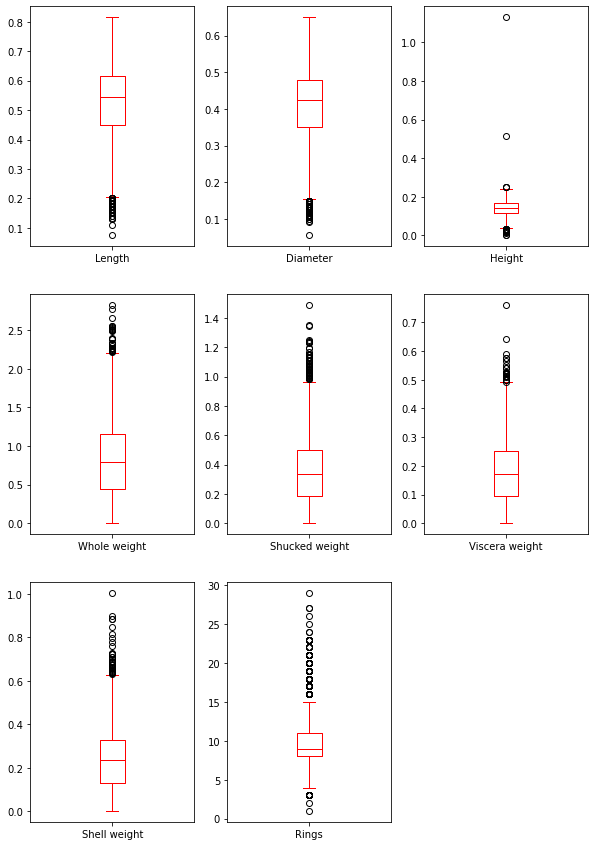

In [31]:
df.plot(kind='box',subplots=True,color = 'red',layout=(3,3),figsize=(10,15))

As outliers are present in almost all columns, let's remove them.

### z score

removing outliers

In [32]:
from scipy.stats import zscore

In [33]:
z=np.abs(zscore(df))
z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [34]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [35]:
df_new=df[(z<3).all(axis=1)]
x=df_new

x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Percentage data loss

In [36]:
loss_percent=(4177-4027)/4027*100
print(loss_percent,'%')

3.7248572138068043 %


Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

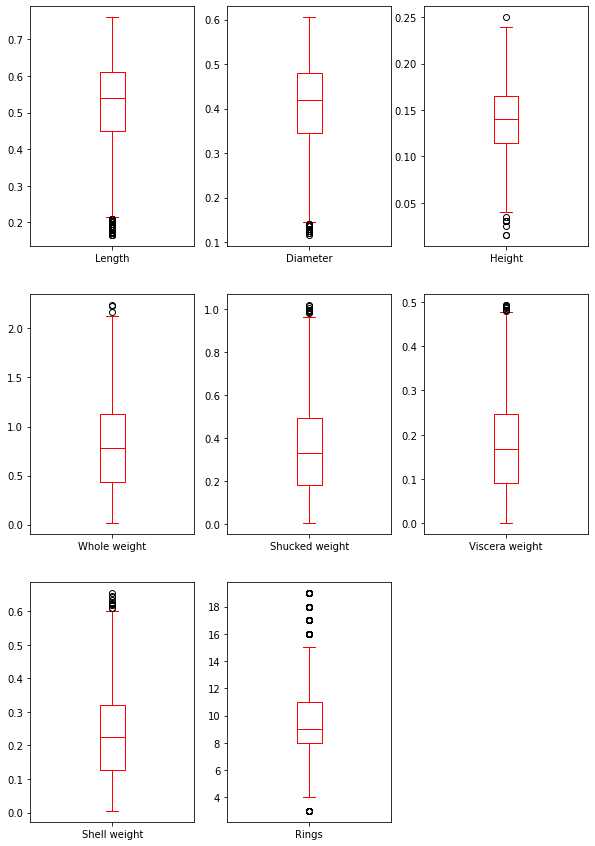

In [37]:
x.plot(kind='box',subplots=True,color = 'red',layout=(3,3),figsize=(10,15))

Some ouliers are still present 

Removing Outliers using IQR:

In [38]:
from scipy import stats
Q1 =x.quantile(q=.25)
Q3 = x.quantile(q=.75)
IQR = x.apply(stats.iqr)

# only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3

df1 = x[~((df_new < (Q1-1.5*IQR)) | (x > (Q3+1.5*IQR))).any(axis=1)]

# find how many rows are left in the dataframe 

df1.shape

(3770, 8)

In [39]:
loss_percent1 =(4177-3770)/3770*100
print(loss_percent1)

10.795755968169761


Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

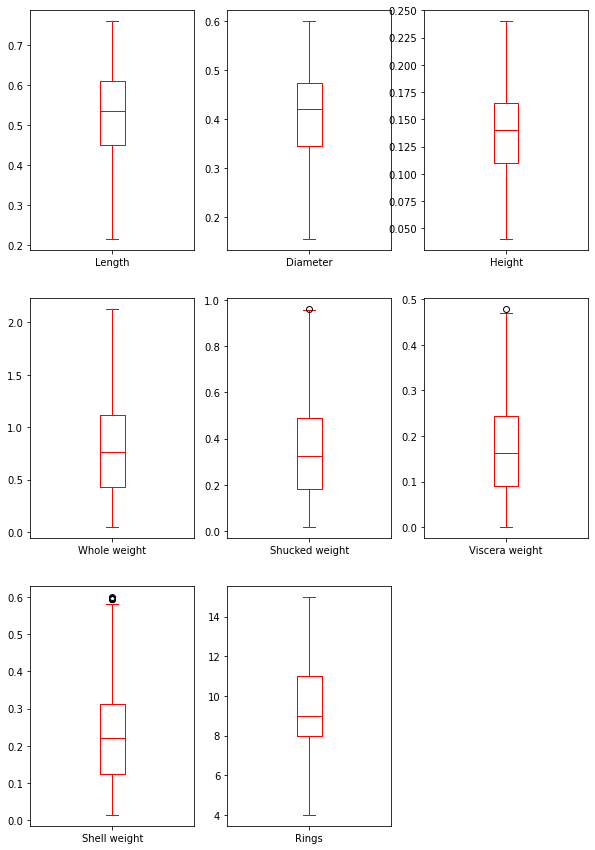

In [40]:
df1.plot(kind='box',subplots=True,color = 'red',layout=(3,3),figsize=(10,15))

As most outliers are removed, we can proceed forward.

### Normal Distribution Curve:

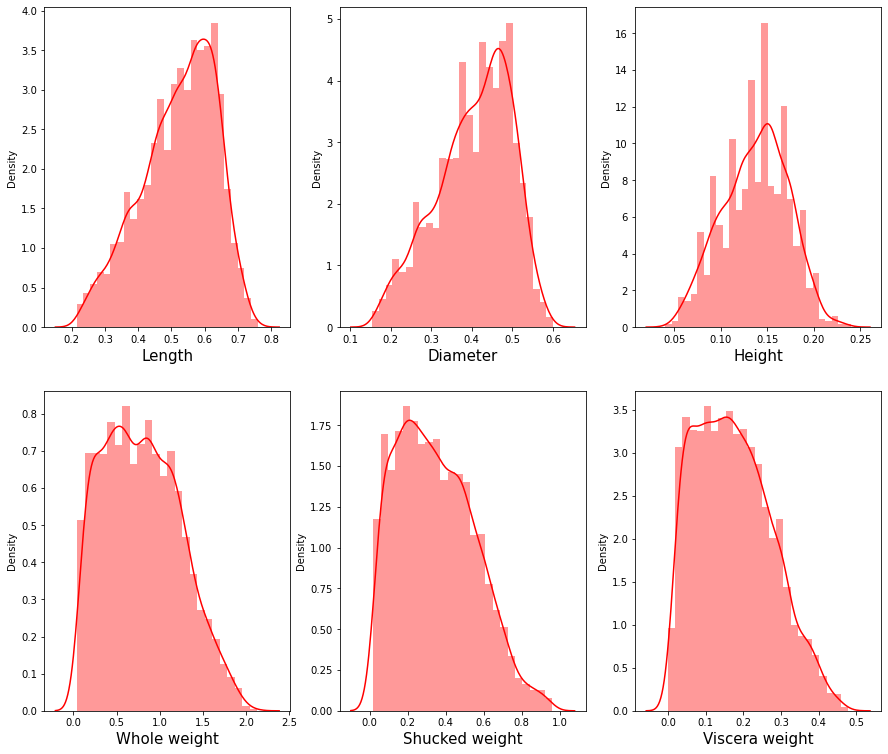

In [41]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],color='r')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Length'>

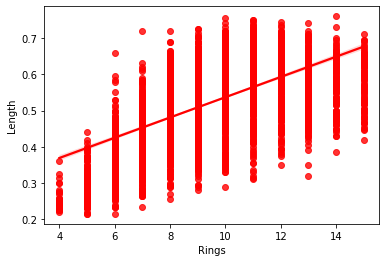

In [42]:
sns.regplot(data=df1, x='Rings', y='Length',color='r')

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

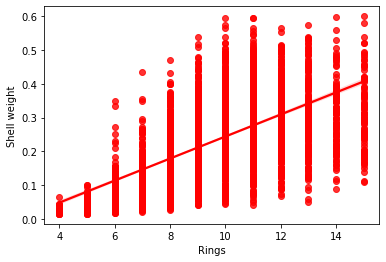

In [43]:
sns.regplot(data = df1, x='Rings', y='Shell weight',color='r')

<AxesSubplot:xlabel='Rings', ylabel='Height'>

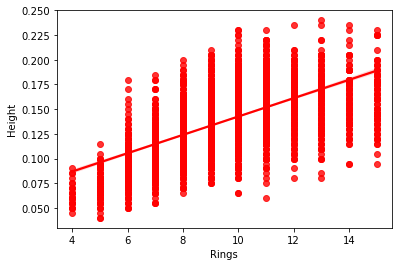

In [44]:
sns.regplot(data = df1, x='Rings', y='Height',color='r')

Observing the above plots, we can state that, with the increase in feature, there is increase in ring size of abalone. Hence its a regression problem.

### Separating features and label

In [45]:
# independent column

x=df1.iloc[:,:-1]
#target
y=df1.iloc[:,-1]

In [46]:
x.shape

(3770, 7)

In [47]:
y.shape

(3770,)

### Skewness check

In [48]:
x.skew()

Length           -0.494267
Diameter         -0.481283
Height           -0.152956
Whole weight      0.334317
Shucked weight    0.455009
Viscera weight    0.428194
Shell weight      0.320592
dtype: float64

In [49]:
# Number of features having skewness more than 0.55 

print(len(x.skew().loc[x.skew()>0.55]))

0


It means that the featured data is not so biased.

### Removing skewness

In [50]:
from sklearn.preprocessing import power_transform

In [51]:
x=power_transform(x,method='yeo-johnson')

In [52]:
x


array([[-0.68301301, -0.53382852, -1.19216524, ..., -0.53783621,
        -0.68355846, -0.57383199],
       [-1.45499705, -1.44138466, -1.32401758, ..., -1.33135129,
        -1.35195417, -1.35421466],
       [-0.02174005,  0.06657551, -0.09394098, ..., -0.35544793,
        -0.22210147, -0.04581562],
       ...,
       [ 0.68747349,  0.74744335,  2.01988638, ...,  0.92665864,
         1.13532423,  0.72835925],
       [ 0.96386232,  0.88043734,  0.33813714, ...,  0.94901985,
         0.91916491,  0.63885038],
       [ 2.00129272,  1.89625712,  1.70253148, ...,  2.33107676,
         1.78300621,  1.96535828]])

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68301301, -0.53382852, -1.19216524, ..., -0.53783621,
        -0.68355846, -0.57383199],
       [-1.45499705, -1.44138466, -1.32401758, ..., -1.33135129,
        -1.35195417, -1.35421466],
       [-0.02174005,  0.06657551, -0.09394098, ..., -0.35544793,
        -0.22210147, -0.04581562],
       ...,
       [ 0.68747349,  0.74744335,  2.01988638, ...,  0.92665864,
         1.13532423,  0.72835925],
       [ 0.96386232,  0.88043734,  0.33813714, ...,  0.94901985,
         0.91916491,  0.63885038],
       [ 2.00129272,  1.89625712,  1.70253148, ...,  2.33107676,
         1.78300621,  1.96535828]])

### Splitting the DataFrame

train test split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)


In [56]:
x_train.shape


(2940, 7)

In [57]:
y_train.shape


(2940,)

In [58]:
x_test.shape


(830, 7)

In [59]:
y_test.shape


(830,)

### Building model

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))

Score:  1.0
r2 score:  -0.03357813701211976


In [63]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.9330099560368513
r2 score:  0.47632489480999674


In [64]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

Score:  0.5424418719355835
r2 score:  0.48550693190017546


In [65]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.23772738089030265
r2 score:  0.2293437040296299


### Hyper parameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

parfr={'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvfr= GridSearchCV(fr,parfr,cv=5) 
gcvfr.fit(x_train,y_train)
gcvfr.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [67]:
parsvr={'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr= GridSearchCV(svr,parsvr,cv=5) 
gcvsvr.fit(x_train,y_train)
gcvsvr.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [68]:
parls={'alpha' : [0.0001,0.001,0.01,0.1,1]}
gcvls= GridSearchCV(ls,parls,cv=5) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 0.001}

### Now using the above parameters let's find the best performing model.

In [69]:
mod1= RandomForestRegressor(criterion='mse', max_features='log2', random_state=45)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

Score:  0.934128103813787
r2 score:  0.497298052612125


In [70]:
mod2= Lasso(alpha=0.001,random_state=45)
mod2.fit(x_train,y_train)
pred2=mod2.predict(x_test)
print('Score: ',mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred2))

Score:  0.49658366506030116
r2 score:  0.4547381163169024


In [71]:
mod3= SVR(kernel='rbf', gamma='scale')
mod3.fit(x_train,y_train)
pred3=mod3.predict(x_test)
print('Score: ',mod3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

Score:  0.5424418719355835
r2 score:  0.48550693190017546


RandomForest is performing better than others.

In [72]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred1))
print('Mean squared error:', mean_squared_error(y_test,pred1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred1)))

Mean absolute error: 1.200566265060241
Mean squared error: 2.471699879518072
Root mean squared error: 1.5721640752536206


### Saving the best model in pickle format

In [74]:
import joblib

joblib.dump(mod1,'Abalone.pkl')

['Abalone.pkl']

In [75]:
loadmodel = joblib.load('Abalone.pkl')

### Executing the model

In [76]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,10,9.30
1,5,5.73
2,10,11.20
3,9,8.54
4,12,10.66
...,...,...
825,8,9.15
826,10,8.60
827,10,10.21
828,11,10.32


#### Hence we can predict the age with respect to rings.